In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Michaelis-Menten equation
def michaelis_menten(conc, Vmax, Km1, Km2):
    S1, S2 = conc
    return (Vmax * S1 * S2) / ((Km1 + S1) * (Km2 + S2))

In [3]:
#Ping-Pong Bi-Bi mechanism equation
def ping_ponVmax_bi(conc, Vmax, Km1, Km2):
    S1, S2 = conc
    return (Vmax * S1) / (Km1 + S1) - (S2 / Km2)

In [4]:
#Alberty rate equation for two substrates
def alberty_rate(conc, Vmax, Km1, Km2):
    S1, S2 = conc
    return Vmax * (S1 - S2) / ((Km1 + S1) * (Km2 + S2))

In [46]:
#Data: Initial velocities (v) and substrate concentrations ([S1], [S2])
#S1: TMB
#S2: H2O2
S1_concentrations = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
S2_concentrations = np.array([0.5, 1.0, 1.5])
initial_velocities = np.array([0.08, 0.16, 0.35, 0.70, 1.30, 2.50])

In [11]:
#Stack concentrations into a 2D array
concentrations =  np.vstack((S1_concentrations, S2_concentrations))

In [14]:
# Fit the data to the Michaelis-Menten equation
popt_mm, _ = curve_fit(michaelis_menten, concentrations, initial_velocities, bounds=(0, [10, 10, 10]))
Vmax_mm, Km1_mm, Km2_mm = popt_mm

In [19]:
# Fit the data to the Ping-Pong Bi-Bi mechanism equation
popt_pp, _ = curve_fit(ping_ponVmax_bi, concentrations, initial_velocities, bounds=(0, [10, 10, 10]))
Vmax_pp, Km1_pp, Km2_pp = popt_pp

In [16]:
# Fit the data to the Alberty rate equation
popt_alberty, _ = curve_fit(alberty_rate, concentrations, initial_velocities, bounds=(0, [10, 10, 10]))
Vmax_alberty, Km1_alberty, Km2_alberty = popt_alberty

In [24]:
# Print the fitted parameters for each model
print(f"Michaelis-MentVmax={Vmax_alberty}, Km1={Km1_mm}, Km2={Km2_mm}")
print(f"Ping-Pong Bi-Bi: Vmax={Vmax_pp}, Km1={Km1_pp}, Km2={Km2_pp}")
print(f"Alberty Rate: Vmax={Vmax_alberty}, Km1={Km1_alberty}, Km2={Km2_alberty}")

Michaelis-MentVmax=5.0, Km1=0.010033110457530971, Km2=8.38159984268668
Ping-Pong Bi-Bi: Vmax=8.980417992663362, Km1=9.999999999999998, Km2=9.99999999902867
Alberty Rate: Vmax=5.0, Km1=5.0, Km2=5.0


In [30]:
# Generate points for plotting the fits
S1_plot = np.linspace(0.1, 5.0, 100)
S2_plot = np.linspace(0.1, 5.0, 100)
concentrations_plot = np.vstack((S1_plot, S2_plot))

In [32]:
# Calculate the fitted velocities for each model
fitted_mm = michaelis_menten(concentrations_plot, Vmax_mm, Km1_mm, Km2_mm)
fitted_pp = ping_ponVmax_bi(concentrations_plot, Vmax_pp, Km1_pp, Km2_pp)
fitted_alberty = alberty_rate(concentrations_plot, Vmax_alberty, Km1_alberty, Km2_alberty)

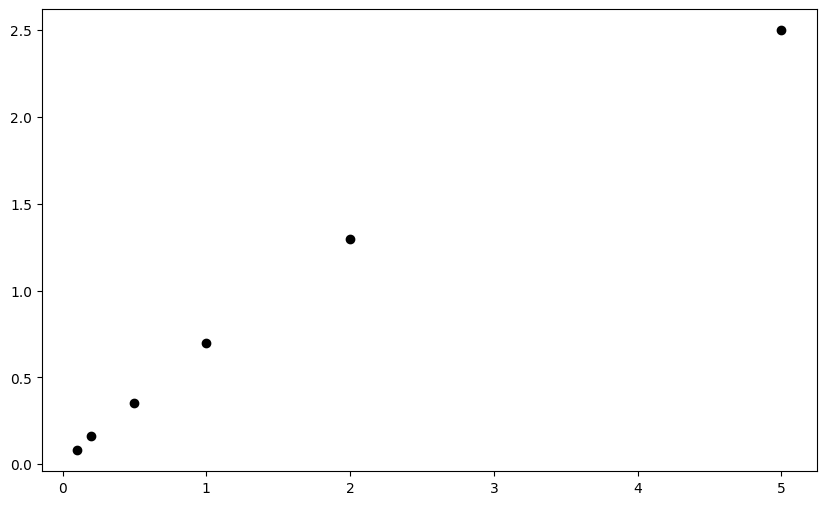

In [33]:
# Plot the initial data and fitted models
plt.figure(figsize=(10, 6))
plt.scatter(S1_concentrations, initial_velocities, label="Data", color='black')

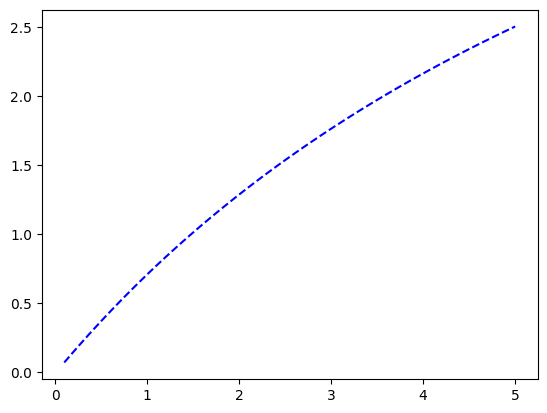

In [41]:
# Michaelis-Menten fit
plt.plot(S1_plot, fitted_mm, label="Michaelis Menten Fit", linestyle='--', color='blue')

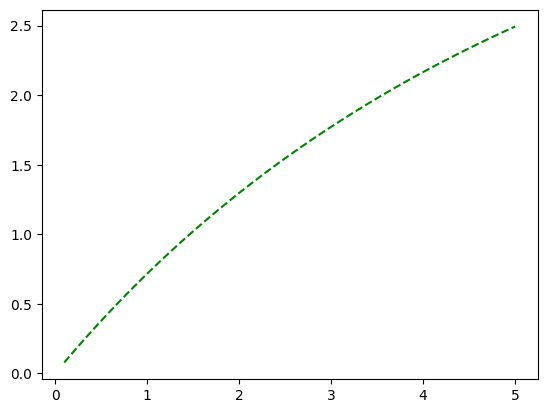

In [35]:
# Ping-Pong Bi-Bi fit
plt.plot(S1_plot, fitted_pp, label="Ping-Pong Bi-Bi Fit", linestyle='--', color='green')

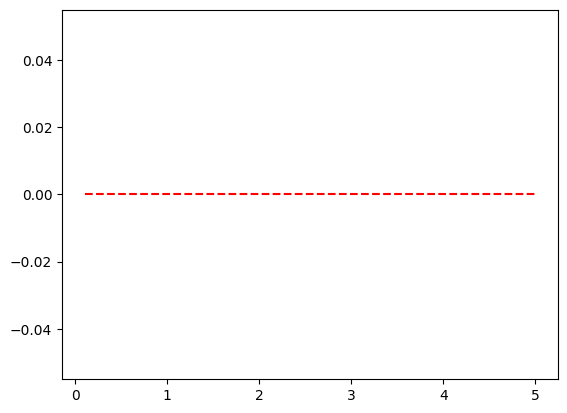

In [42]:
# Alberty rate fit
plt.plot(S1_plot, fitted_alberty, label="Alberty Rate Fit", linestyle='--', color='red')

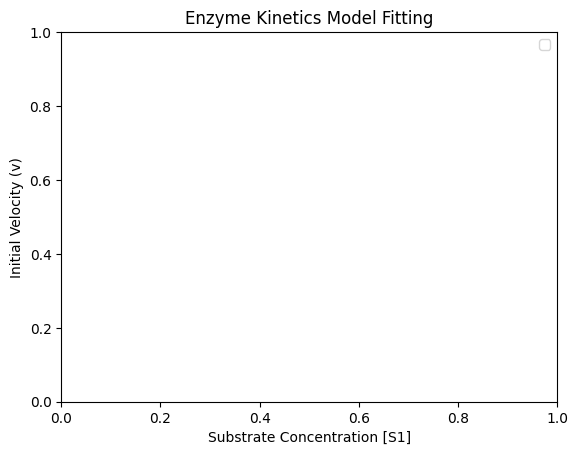

In [43]:
# Add labels and legend
plt.xlabel("Substrate Concentration [S1]")
plt.ylabel("Initial Velocity (v)")
plt.title("Enzyme Kinetics Model Fitting")
plt.legend()

In [44]:
# Show plot
plt.show()